# Import modules

In [55]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

# import data

In [16]:
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# 1. Data exploration

In [17]:
print(df.columns)

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [19]:
df.head(3)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0


In [20]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [21]:
df.shape

(148, 6)

In [22]:
#unique values
lengths = {}
for feature in df.columns:
    unique_values = df[feature].unique()
    lengths[feature] = {'unique_values': unique_values, 'length': len(unique_values)}
for feature, info in lengths.items():
    print(f"Feature: {feature}")
    print(f"Unique values: {info['unique_values']}")
    print(f"Number of unique values: {info['length']}")
    print("-" * 30)

Feature: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values: 7
------------------------------
Feature: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values: 30
------------------------------
Feature: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values: 41
------------------------------
Feature: Place
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values: 12
------------------------------
Feature: Country
Unique values: ['India']
Number of unique values: 1
-

In [23]:
#renaming columns
df.rename(columns={"Company":"Company Name"},inplace=True)
df.rename(columns={"Place":"Location"},inplace=True)
df

,Company Name,Age,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# 2. Data cleaning

#finding number of missing values in each feature
df.isnull().sum()

In [24]:
#finding duplicates
duplicates=df[df.duplicated()]
duplicates

,Company Name,Age,Salary,Location,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [25]:
#removing duplicates
df.drop_duplicates()

,Company Name,Age,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [26]:
#finding outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers


,Company Name,Age,Salary,Location,Country,Gender


In [51]:
# Replace 0 in 'age' with NaN

In [27]:
df['Age'].replace(0, np.nan, inplace=True)


In [28]:
# replacing missing values with mean values
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Salary"].fillna(df["Salary"].mean(),inplace=True)
df["Company Name"].fillna("Unknown",inplace=True)
df["Location"].fillna("Unknown",inplace=True)
df["Gender"].fillna(0,inplace=True)


In [29]:
df

,Company Name,Age,Salary,Location,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


# 3. Data Analysis

In [ ]:
# Filter data with age > 40 and salary < 5000

In [30]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company Name,Age,Salary,Location,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [62]:
# Plot a chart with age and salary


In [31]:
import matplotlib.pyplot as plt


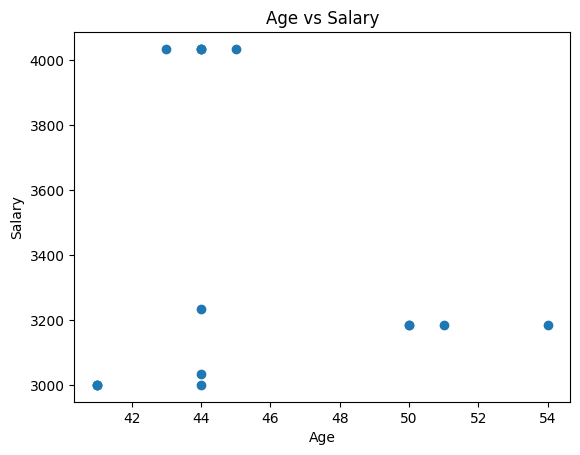

In [32]:
plt.scatter(filtered_data['Age'], filtered_data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()


In [33]:
# Count the number of people from each Location and represent it visually

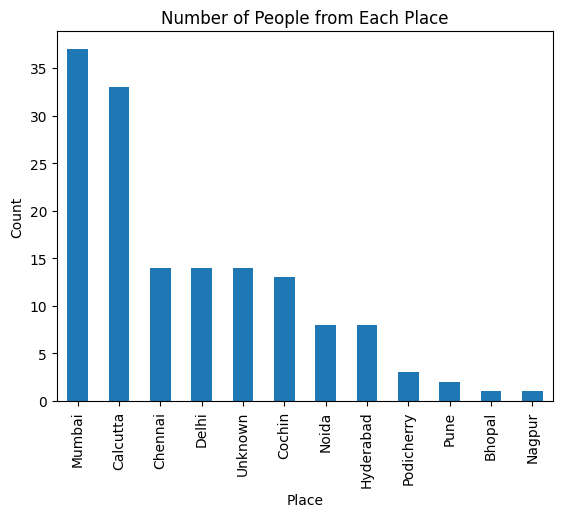

In [38]:
place_counts = df['Location'].value_counts()
place_counts.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.show()



# 4. Data encoding

In [40]:
# You can choose encoding methods here (e.g., one-hot encoding, label encoding)
# For example, for one-hot encoding:

In [44]:
data_encoded = pd.get_dummies(df, columns=['Company Name', 'Location'])
data_encoded

,Age,Salary,Country,Gender,Company Name_CTS,Company Name_Congnizant,Company Name_Infosys,Company Name_Infosys Pvt Lmt,Company Name_TCS,Company Name_Tata Consultancy Services,...,Location_Chennai,Location_Cochin,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Podicherry,Location_Pune,Location_Unknown
0,20.0,5312.467742,India,0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,30.0,5312.467742,India,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.000000,India,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,India,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.000000,India,0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,India,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
144,22.0,8787.000000,India,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145,44.0,4034.000000,India,1,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
146,33.0,5034.000000,India,1,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [49]:
#another method for one hot encoding
encoded_columns=["Company Name","Location"]
onehot_encode=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_cols=onehot_encode.fit_transform(df[encoded_columns])

data_encoded=pd.DataFrame(encoded_cols)
data_onehotencoded=df.join(data_encoded)
data_onehotencoded

,Company Name,Age,Salary,Location,Country,Gender,0,1,2,3,...,9,10,11,12,13,14,15,16,17,18
0,TCS,20.0,5312.467742,Chennai,India,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Infosys,30.0,5312.467742,Mumbai,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TCS,35.0,2300.000000,Calcutta,India,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Infosys,40.0,3000.000000,Delhi,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCS,23.0,4000.000000,Mumbai,India,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,Infosys,22.0,8787.000000,Calcutta,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,Infosys,44.0,4034.000000,Delhi,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,TCS,33.0,5034.000000,Mumbai,India,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#label encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

In [63]:

label_encoder = LabelEncoder()
encoded_data = df.copy()  # Create a copy to avoid modifying the original data
encoded_data["Company Name"] = label_encoder.fit_transform(df["Company Name"])
encoded_data["Salary"] = label_encoder.fit_transform(df["Salary"])


In [64]:
encoded_data

,Company Name,Age,Salary,Location,Country,Gender
0,4,20.0,21,Chennai,India,0
1,2,30.0,21,Mumbai,India,0
2,4,35.0,3,Calcutta,India,0
3,2,40.0,5,Delhi,India,0
4,4,23.0,12,Mumbai,India,0
...,...,...,...,...,...,...
143,4,33.0,38,Calcutta,India,1
144,2,22.0,35,Calcutta,India,1
145,2,44.0,13,Delhi,India,1
146,4,33.0,19,Mumbai,India,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  148 non-null    object 
 1   Age           148 non-null    float64
 2   Salary        148 non-null    float64
 3   Location      148 non-null    object 
 4   Country       148 non-null    object 
 5   Gender        148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


# 5. Featuring scale

In [68]:
# Using StandardScaler

In [82]:
from sklearn.preprocessing import StandardScaler

In [97]:
# StandardScaler
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(df[['Age', 'Salary']])

In [93]:
scaled_data_standard

array([[-1.45214324e+00,  0.00000000e+00],
       [-2.37943902e-01,  0.00000000e+00],
       [ 3.69155766e-01, -1.28390198e+00],
       [ 9.76255435e-01, -9.85564718e-01],
       [-1.08788344e+00, -5.59368625e-01],
       [-4.31370260e-16, -1.33172531e-01],
       [-4.31370260e-16,  2.93023563e-01],
       [-1.08788344e+00,  7.19219656e-01],
       [ 2.47735833e-01,  1.14541575e+00],
       [ 1.58335510e+00,  1.57161184e+00],
       [-1.08788344e+00,  0.00000000e+00],
       [ 2.47735833e-01, -1.80002545e+00],
       [ 1.58335510e+00,  0.00000000e+00],
       [-1.69498311e+00, -1.73822702e+00],
       [ 9.76255435e-01, -9.85564718e-01],
       [-1.08788344e+00, -9.85564718e-01],
       [-1.08788344e+00, -9.72778836e-01],
       [ 2.47735833e-01, -1.33172531e-01],
       [-1.20930337e+00,  0.00000000e+00],
       [ 4.89596507e-03,  0.00000000e+00],
       [ 6.11995634e-01, -9.66385894e-01],
       [ 2.19045477e+00, -9.07144637e-01],
       [-1.33072331e+00, -2.08183043e-01],
       [-4.

In [98]:

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(df[['Age', 'Salary']])


In [99]:
scaled_data_minmax

array([[0.08108108, 0.48064957],
       [0.35135135, 0.48064957],
       [0.48648649, 0.13781723],
       [0.62162162, 0.21748037],
       [0.16216216, 0.33128485],
       [0.40431561, 0.44508934],
       [0.40431561, 0.55889382],
       [0.16216216, 0.6726983 ],
       [0.45945946, 0.78650279],
       [0.75675676, 0.90030727],
       [0.16216216, 0.48064957],
       [0.45945946, 0.        ],
       [0.75675676, 0.48064957],
       [0.02702703, 0.01650165],
       [0.62162162, 0.21748037],
       [0.16216216, 0.21748037],
       [0.16216216, 0.2208945 ],
       [0.45945946, 0.44508934],
       [0.13513514, 0.48064957],
       [0.40540541, 0.48064957],
       [0.54054054, 0.22260157],
       [0.89189189, 0.23842039],
       [0.10810811, 0.42505975],
       [0.40431561, 0.54011608],
       [0.40431561, 0.68225788],
       [0.16216216, 0.89382042],
       [0.45945946, 0.82576534],
       [0.75675676, 0.93262775],
       [0.16216216, 1.        ],
       [0.48648649, 0.10754524],
       [0.